In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv("/content/fcc-forum-pageviews.csv",parse_dates=['date'],index_col='date')

In [ ]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
low_percentile = df['value'].quantile(0.025)
high_percentile = df['value'].quantile(0.0975)
df_cleaned = df[(df['value'] >= low_percentile) & (df['value']<=high_percentile)]

In [ ]:
df_cleaned.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [ ]:
df_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2017-04-08,24879
2017-04-09,23871
2017-04-22,25124


In [ ]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
  figsize = (15,5)
  plt.plot(df_cleaned['value'],color='red')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  plt.show()

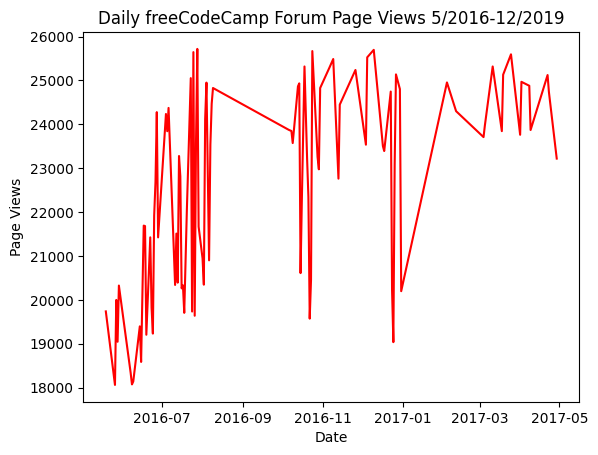

In [ ]:
draw_line_plot()

In [ ]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
  df_bar = df.copy()
  df_bar['year'] = df_bar.index.year
  df_bar['month']  = df_bar.index.month
  df_bar = df_bar.groupby(['year','month'])['value'].mean()
  df_bar = df_bar.unstack()
  df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
  fig = df_bar.plot.bar(figsize=(10,10),legend=True)
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')

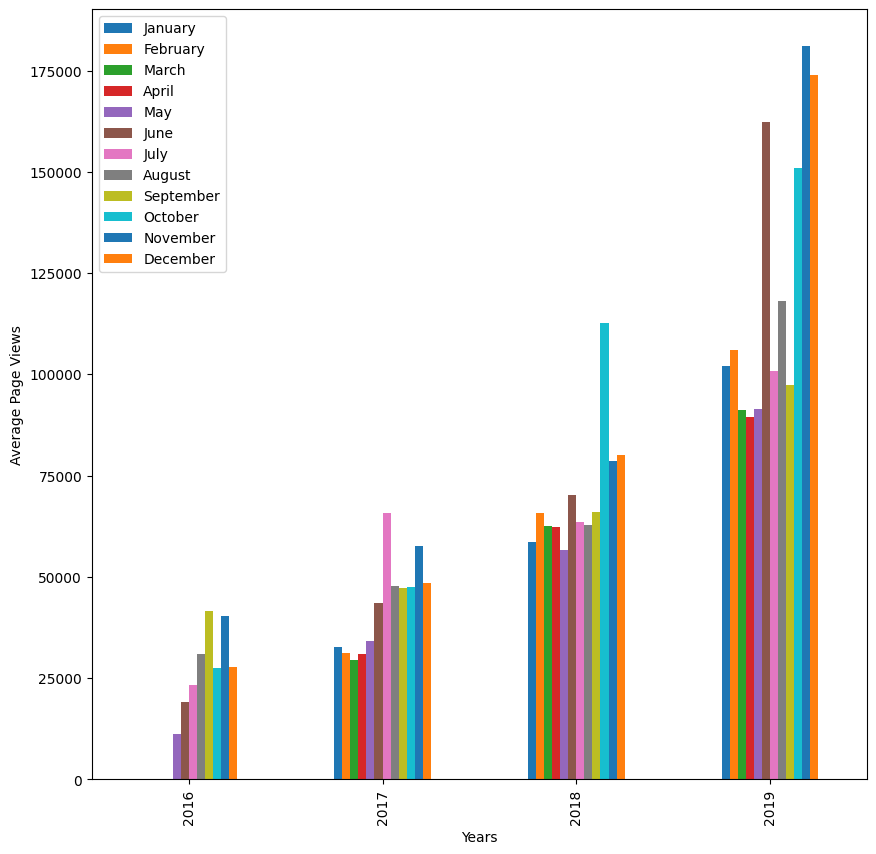

In [ ]:
draw_bar_plot()

In [32]:
#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
    sns.boxplot(data = df_box, ax = ax1, x = "year", y = "value")
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    sns.boxplot(data = df_box, ax = ax2, x = "month", y = "value")
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

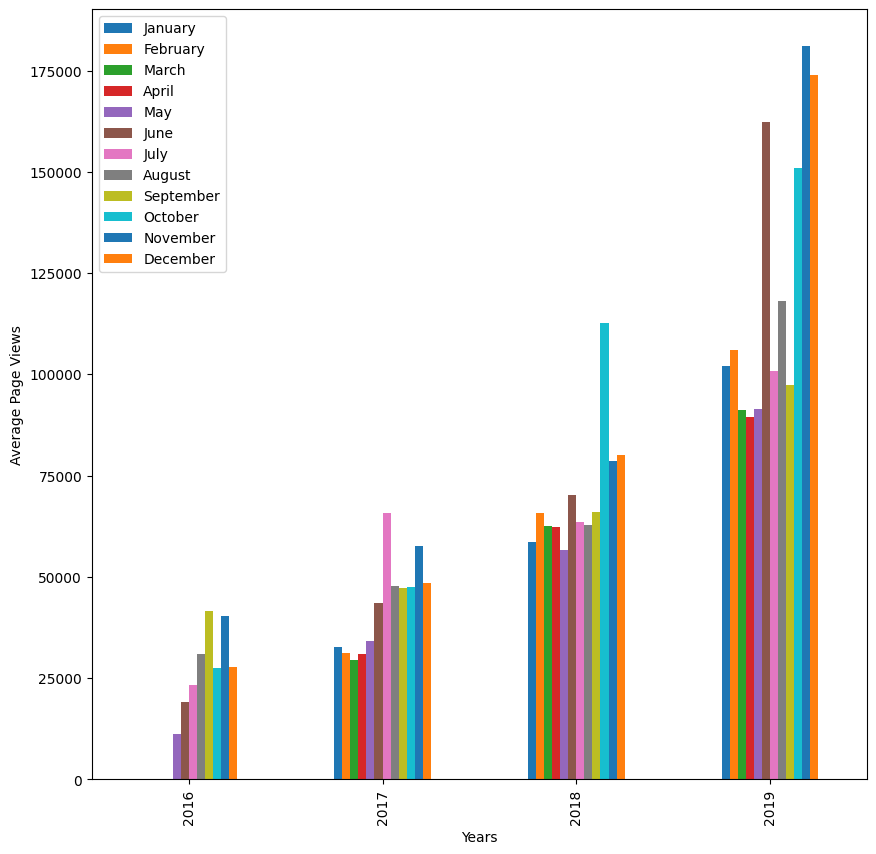

In [33]:
draw_bar_plot()